Based on https://www.datacamp.com/community/tutorials/adaboost-classifier-python 

# The Data Set We Will Use

In [20]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data

y = iris.target

print('Shape X:','\n',X.shape)

print('Shape y:','\n',y.shape)

Shape X: 
 (150, 4)
Shape y: 
 (150,)


# Splitting the Data Set Into Training Data and Test Data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

# Training The AdaBoost Model
AdaBoost base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
This validates this example as a boosted trees example

In [22]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

model = abc.fit(X_train, y_train)

# Making Predictions With Our AdaBoost Model

In [23]:
y_pred = model.predict(X_test)

# Assessing the Performance of Our AdaBoost Model

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



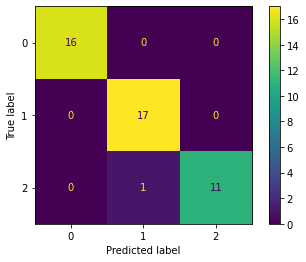

In [25]:
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

plot_confusion_matrix(model, X_test, y_test)

plt.show()

# Using SVM instead Decision Tree as Base Learner

In [26]:
from sklearn.svm import SVC

svc=SVC(probability=True, kernel='linear')

abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



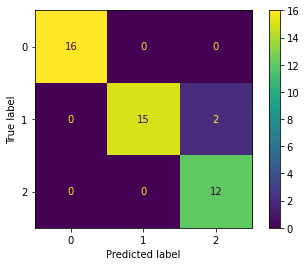

In [27]:
plot_confusion_matrix(model, X_test, y_test)

plt.show()

# Conclusion

Pros
AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

Cons
AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.